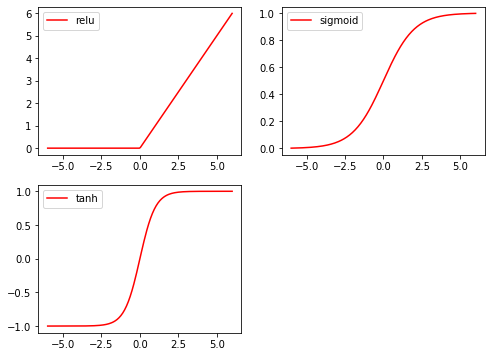

In [2]:
import torch 
from torch.autograd import Variable #导入变量
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline 

# np_data = np.arange(4).reshape(2,2)
# print(np_data)
# torch_data = torch.from_numpy(np_data)
# print(torch_data)

# print(np_data.dot(np_data))
# print(torch_data.mm(torch_data))

tensor = torch.linspace(-6, 6, 200)
tensor = Variable(tensor) #导入变量
np_data = tensor.data.numpy() #转为numpy作图

# 激活函数
y_relu = torch.relu(tensor).data.numpy() 
y_sigmoid = torch.sigmoid(tensor).data.numpy()
y_tanh = torch.tanh(tensor).data.numpy()

#损失函数
torch.nn.MSELoss(reduction='mean') # none, mean, average 
torch.nn.CrossEntropyLoss(reduction= 'mean')

plt.figure(1, figsize= (8,6))
plt.subplot(221)
plt.plot(np_data, y_relu, c = 'red', label = 'relu')
plt.legend(loc = 'best')
plt.subplot(222)
plt.plot(np_data, y_sigmoid, c = 'red', label = 'sigmoid')
plt.legend(loc = 'best')
plt.subplot(223)
plt.plot(np_data, y_tanh, c = 'red', label = 'tanh')
plt.legend(loc = 'best')

plt.show()

In [3]:
import torch 
t1 = torch.Tensor(1) # 返回张量，随机化值
t2 = torch.tensor(1)
print('ti is {}, type is {}'.format(t1, type(t1)))
print('t2 is {}, type is {}'.format(t2, type(t2)))

x = torch.randn(2,3)
x.size()
print(x)
x = x.view(3,2)
x.size()
print(x)
y = x.view(-1)
print(y)

# numpy squeeze 的逆向
z = y.unsqueeze(1)
print(z.size())

# 索引
torch.manual_seed(10000)
x = torch.randn(2, 3)
mask = x > 0
y = torch.masked_select(x, mask)
print(x)
print(y)
torch.nonzero(x)

ti is tensor([7.0065e-45]), type is <class 'torch.Tensor'>
t2 is 1, type is <class 'torch.Tensor'>
tensor([[ 0.5504,  0.9850,  0.0269],
        [ 0.7183, -0.4532,  0.7846]])
tensor([[ 0.5504,  0.9850],
        [ 0.0269,  0.7183],
        [-0.4532,  0.7846]])
tensor([ 0.5504,  0.9850,  0.0269,  0.7183, -0.4532,  0.7846])
torch.Size([6, 1])
tensor([[ 2.0065,  1.9535,  0.1517],
        [-0.4269, -0.5059, -0.7723]])
tensor([2.0065, 1.9535, 0.1517])


tensor([[0, 0],
        [0, 1],
        [0, 2],
        [1, 0],
        [1, 1],
        [1, 2]])

In [4]:
t = torch.randn(1,3)
t1 = torch.randn(3,1)
t2 = torch.randn(1,3)
t3 = torch.linspace(0.1, 1, 10)
# t + 1 * (t1/t2)
torch.addcdiv(t, 1, t1, t2)

# 将t限制在[0, 1]之间
torch.clamp_(t3, 0, 1)
# t.add_(1)
print(t3)

tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000,
        1.0000])


In [5]:
t4 = torch.arange(16).view(2,8)
print(t4)

# 按照列，求和，并且保留维度
t4.sum(dim = 1, keepdim= True)

# 按照行，求和，保留维度
t4.sum(dim = 0, keepdim=True)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15]])


tensor([[ 8, 10, 12, 14, 16, 18, 20, 22]])

In [6]:
# torch.dot 一维点积， mm（2维点积）， bmm（带batch的矩阵乘法）
a = torch.tensor([2,3])
b = torch.tensor([3,4])
torch.dot(a, b)

# torch.mm 
x = torch.randint(10, (2,3))
y = torch.randint(6, (3,4))
torch.mm(x, y)

# torch.bmm 
x = torch.randint(10, (2,2,3))
y = torch.randint(6, (2,3,4))
torch.bmm(x, y)

tensor([[[ 5, 25, 25,  5],
         [35, 49, 52, 35]],

        [[36, 57, 35, 26],
         [16, 43, 27, 22]]])

# pytorch, tensor 实现线性回归

In [30]:
import torch as t 
from matplotlib import pyplot as plt 
from IPython import display 
%matplotlib inline

device = t.device('cpu')

In [31]:
t.manual_seed(1000)

def get_fake_data(batch_size = 8):
    ''' 产生随机数据集，y = x * 2 + 3, 加上一些噪声 '''
    x = t.rand(batch_size, 1, device = device)
    y = x * 2 + 3 + t.randn(batch_size, 1, device = device)
    return x, y 

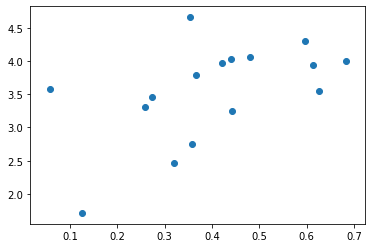

In [32]:
x, y = get_fake_data(batch_size= 16)

plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

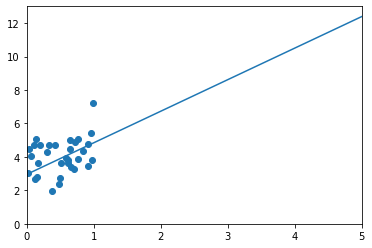

w: 1.8243606090545654 ,b 3.0745413303375244


In [35]:
# 线性回归
w = t.rand(1,1).to(device)
b = t.zeros(1,1).to(device)
lr = 0.02  

for ii in range(500):
    x, y = get_fake_data(batch_size=4)

    #forward: loss
    y_pred = x.mm(w) + b.expand_as(y) #扩展size，并且改变b
    loss = 0.5 *(y_pred- y) ** 2
    loos = loss.mean()

    #backward:grad
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()

    # update param
    w.sub_(lr * dw)
    b.sub_(lr * db)

    if ii % 50 == 0:
        display.clear_output(wait = True)
        x = t.arange(0,6).view(-1,1)
        y = x.float().mm(w) + b.expand_as(x)
        plt.plot(x.numpy(), y.numpy()) # predicted

        x2, y2 = get_fake_data(batch_size=32)
        plt.scatter(x2.numpy(), y2.numpy())
        plt.xlim(0,5)
        plt.ylim(0,13)
        plt.show()
        plt.pause(0.5)
print('w:', w.item(), ',b', b.item())